<a href="https://colab.research.google.com/github/ameerjasser/data-science-toolkit/blob/main/Deploved_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science in Finance & FinTech**

**Banks run into losses when customers don't pay their loans on time. Because of this, every year, banks have losses in crores, and this also impacts the country's economic growth to a large extent. In this project, we look at various attributes such as funded amount, location, loan, balance, etc., to predict whether a person will be a loan defaulter.**

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/Project/train.csv') #load the csv dataset into a 'dataframe' df

In [ ]:
df.head()              # see the first 5 columns

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [ ]:
# --- FIX THE MISALIGNED DATA ---

# Check unique values for all 'object' or suspected categorical columns
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"Column: {col} | Unique Values: {unique_count} | Dtype: {df[col].dtype}")

    # If a column that should be a category (like 'Grade' or 'Status')
    # has thousands of unique float values, it is mislabeled.
    if unique_count > 100 and df[col].dtype in ['float64', 'int64']:
         print(f"  --> ALERT: {col} might be mislabeled (too many unique numbers)")
    print("\n\n")


Column: ID | Unique Values: 67463 | Dtype: int64
  --> ALERT: ID might be mislabeled (too many unique numbers)



Column: Loan Amount | Unique Values: 27525 | Dtype: int64
  --> ALERT: Loan Amount might be mislabeled (too many unique numbers)



Column: Funded Amount | Unique Values: 24548 | Dtype: int64
  --> ALERT: Funded Amount might be mislabeled (too many unique numbers)



Column: Funded Amount Investor | Unique Values: 67441 | Dtype: float64
  --> ALERT: Funded Amount Investor might be mislabeled (too many unique numbers)



Column: Term | Unique Values: 3 | Dtype: int64



Column: Batch Enrolled | Unique Values: 41 | Dtype: object



Column: Interest Rate | Unique Values: 67448 | Dtype: float64
  --> ALERT: Interest Rate might be mislabeled (too many unique numbers)



Column: Grade | Unique Values: 7 | Dtype: object



Column: Sub Grade | Unique Values: 35 | Dtype: object



Column: Employment Duration | Unique Values: 3 | Dtype: object



Column: Home Ownership | Unique Value

In [ ]:
# --- FIX THE MISALIGNED DATA ---

# 1. Temporarily store the actual Home Ownership status (RENT/MORTGAGE/OWN)
#    from the 'Employment Duration' column.
temp_home_ownership_status = df['Employment Duration']

# 2. Move the Annual Income values from 'Home Ownership' to a new, correctly named column.
df = df.rename(columns={'Home Ownership': 'Annual_Income'})

# 3. Assign the actual Home Ownership status to its correctly named column.
#    Since 'Employment Duration' might be needed later, we can rename that column as well.
df = df.rename(columns={'Employment Duration': 'Home_Ownership'})

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Home_Ownership                67463 non-null  object 
 10  Annual_Income                 67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

When column names are lowercase and have no spaces, you can access them as attributes rather than using brackets and quotes.

Standardizes and Reduces Errors

Follows Python Best Practices (PEP 8)

In [ ]:
# 1. Basic cleaning: lowercase and replace spaces/hyphens with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('-', '')

# 2. Specific renaming for clarity/typos
df = df.rename(columns={
    'id': 'loan_id',
    'inquires__six_months': 'inquiries_6m',
    'delinquency__two_years': 'delinquency_2y',
    'debit_to_income': 'dti',
    'collection_12_months_medical': 'med_collections_12m'
})

print(df.columns)


Index(['loan_id', 'loan_amount', 'funded_amount', 'funded_amount_investor',
       'term', 'batch_enrolled', 'interest_rate', 'grade', 'sub_grade',
       'home_ownership', 'annual_income', 'verification_status',
       'payment_plan', 'loan_title', 'dti', 'delinquency_2y', 'inquiries_6m',
       'open_account', 'public_record', 'revolving_balance',
       'revolving_utilities', 'total_accounts', 'initial_list_status',
       'total_received_interest', 'total_received_late_fee', 'recoveries',
       'collection_recovery_fee', 'med_collections_12m', 'application_type',
       'last_week_pay', 'accounts_delinquent', 'total_collection_amount',
       'total_current_balance', 'total_revolving_credit_limit', 'loan_status'],
      dtype='object')


In [ ]:
# Write a function that returns the each column name with the number of missing values.

print('--Columns and the number of missing values--')

for column_name in df.columns:
  n_missing = df[column_name].isna().sum()
  print(f'{column_name} : {n_missing}')

--Columns and the number of missing values--
loan_id : 0
loan_amount : 0
funded_amount : 0
funded_amount_investor : 0
term : 0
batch_enrolled : 0
interest_rate : 0
grade : 0
sub_grade : 0
home_ownership : 0
annual_income : 0
verification_status : 0
payment_plan : 0
loan_title : 0
dti : 0
delinquency_2y : 0
inquiries_6m : 0
open_account : 0
public_record : 0
revolving_balance : 0
revolving_utilities : 0
total_accounts : 0
initial_list_status : 0
total_received_interest : 0
total_received_late_fee : 0
recoveries : 0
collection_recovery_fee : 0
med_collections_12m : 0
application_type : 0
last_week_pay : 0
accounts_delinquent : 0
total_collection_amount : 0
total_current_balance : 0
total_revolving_credit_limit : 0
loan_status : 0


In [ ]:
df.drop('loan_status', axis=1, inplace=True)

In [ ]:
#Convert types like (float to integer, string to integers) to reduce the size and there isn't any integer stored as string to convert it

In [ ]:
# Identify float and integer and object columns
float_cols = df.select_dtypes(include=['float']).columns
int_cols = df.select_dtypes(include=['integer']).columns

# Downcast floats to the smallest possible float type (e.g., float32)
df[float_cols] = df[float_cols].apply(pd.to_numeric, downcast='float')

# Downcast integers to the smallest possible integer type (e.g., int8, int16)
df[int_cols] = df[int_cols].apply(pd.to_numeric, downcast='integer')

In [ ]:
# Use df.info to identify which columns has a lot of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   loan_id                       67463 non-null  int32  
 1   loan_amount                   67463 non-null  int32  
 2   funded_amount                 67463 non-null  int32  
 3   funded_amount_investor        67463 non-null  float64
 4   term                          67463 non-null  int8   
 5   batch_enrolled                67463 non-null  object 
 6   interest_rate                 67463 non-null  float32
 7   grade                         67463 non-null  object 
 8   sub_grade                     67463 non-null  object 
 9   home_ownership                67463 non-null  object 
 10  annual_income                 67463 non-null  float64
 11  verification_status           67463 non-null  object 
 12  payment_plan                  67463 non-null  object 
 13  l


 **# Convert Strings to the category Type, converting it to category can reduce memory usage by up to 90%.**

**Good for Category:** Grade, Sub Grade, Employment Duration, Home Ownership, Verification Status, Payment Plan, Initial List Status, Application Type. (These have a limited set of repeated values).

**Bad for Category:** Loan Title or Batch Enrolled (if they have thousands of unique, non-repeating names).

In [ ]:
# Specific columns that are clearly categorical
cat_features = [
    'grade', 'sub_grade', 'home_ownership',
    'verification_status', 'payment_plan', 'initial_list_status', 'application_type'
]

for col in cat_features:
    df[col] = df[col].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   loan_id                       67463 non-null  int32   
 1   loan_amount                   67463 non-null  int32   
 2   funded_amount                 67463 non-null  int32   
 3   funded_amount_investor        67463 non-null  float64 
 4   term                          67463 non-null  int8    
 5   batch_enrolled                67463 non-null  object  
 6   interest_rate                 67463 non-null  float32 
 7   grade                         67463 non-null  category
 8   sub_grade                     67463 non-null  category
 9   home_ownership                67463 non-null  category
 10  annual_income                 67463 non-null  float64 
 11  verification_status           67463 non-null  category
 12  payment_plan                  67463 non-null  

In [ ]:
df.head()

,loan_id,loan_amount,funded_amount,funded_amount_investor,term,batch_enrolled,interest_rate,grade,sub_grade,home_ownership,...,total_received_late_fee,recoveries,collection_recovery_fee,med_collections_12m,application_type,last_week_pay,accounts_delinquent,total_collection_amount,total_current_balance,total_revolving_credit_limit
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237562,C,D3,RENT,...,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545883,F,D4,MORTGAGE,...,18.778660,4.316278,1.020075,0,INDIVIDUAL,66,0,34,89801,26155
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,19.306646,1294.818726,0.368953,0,INDIVIDUAL,18,0,430,126029,22579


In [ ]:
# Compare memory usage before and after
print(df.info(memory_usage='deep'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   loan_id                       67463 non-null  int32   
 1   loan_amount                   67463 non-null  int32   
 2   funded_amount                 67463 non-null  int32   
 3   funded_amount_investor        67463 non-null  float64 
 4   term                          67463 non-null  int8    
 5   batch_enrolled                67463 non-null  object  
 6   interest_rate                 67463 non-null  float32 
 7   grade                         67463 non-null  category
 8   sub_grade                     67463 non-null  category
 9   home_ownership                67463 non-null  category
 10  annual_income                 67463 non-null  float64 
 11  verification_status           67463 non-null  category
 12  payment_plan                  67463 non-null  

Replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value.

from sklearn.impute import SimpleImputer

In [ ]:
# A function that returns the each column name with the number of missing values."
print('--Columns and the number of missing values--')
missing_data_summary = df.isna().sum()
print(missing_data_summary[missing_data_summary > 0])



--Columns and the number of missing values--
Series([], dtype: int64)


That is fantastic news! The output Series([], dtype: int64) means our training dataset has zero missing values.

So we can officially skip the entire SimpleImputer step.

# **2. Noisy data**

# 2.1 Remove Outliers using Visualization

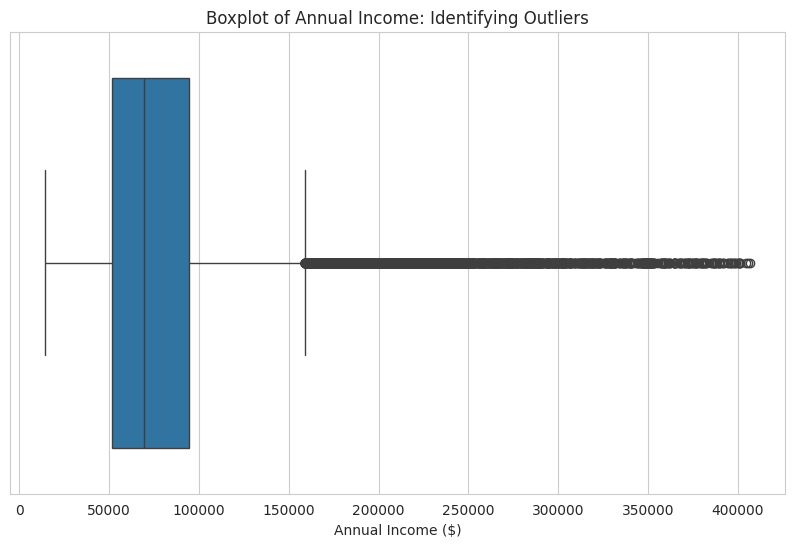

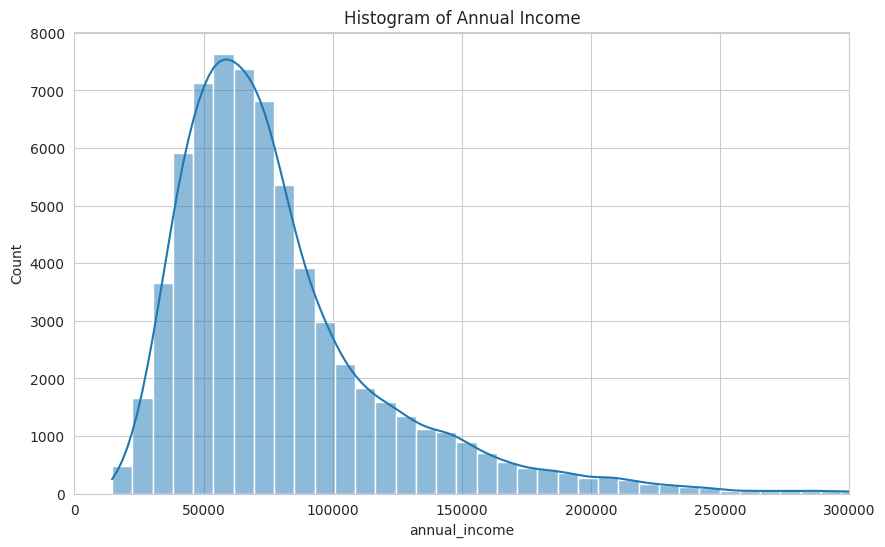

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for better visualization
sns.set_style("whitegrid")

# Create a boxplot for annual income
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['annual_income'])
plt.title('Boxplot of Annual Income: Identifying Outliers')
plt.xlabel('Annual Income ($)')
plt.show()

# Also use a histogram to see the distribution shape
plt.figure(figsize=(10, 6))
sns.histplot(df['annual_income'], bins=50, kde=True)
plt.title('Histogram of Annual Income')
plt.xlim(0, 300000) # Setting a limit just for visualization purposes
plt.show()


# 2.2 Remove Non-Sensible Values (Filtering)

We can use descriptive statistics to define a sensible cutoff point.

**Code to filter out extreme high incomes:**

In [ ]:
# Use the .describe() method to see the 75th percentile and max values
print(df['annual_income'].describe())

# We might decide that incomes above a certain threshold (e.g., $400,000) are too rare to be useful noise
# We keep values below a manually chosen threshold
threshold_income = 200000
df_filtered = df[df['annual_income'] <= threshold_income]

print(f"\nOriginal number of rows: {len(df)}")
print(f"Number of rows after removing extreme income values: {len(df_filtered)}")

# Update your main DataFrame reference
df = df_filtered


count     67463.000000
mean      80541.502522
std       45029.120366
min       14573.537170
25%       51689.843335
50%       69335.832680
75%       94623.322785
max      406561.536400
Name: annual_income, dtype: float64

Original number of rows: 67463
Number of rows after removing extreme income values: 65702


quick check to ensure we haven't dropped more than ~5-10% of our rows

In [ ]:
percent_dropped = ((67463 - len(df)) / 67463) * 100
print(f"Percentage of data dropped: {percent_dropped:.2f}%")

Percentage of data dropped: 2.61%


let's move to the next most "noisy" columns in financial datasets: revolving_utilities (Credit Card Utilization) and dti (Debt-to-Income Ratio).

Next Step: Cleaning revolving_utilities and dti

1. revolving_utilities: This represents how much of their credit limit a person is using.

*   Sensible Range: 0 to 100 (percentage).
*   The Issue: Sometimes users go over their limit (e.g., 105%), which is real data. But values like 500 or 1000 are usually data entry errors.

2. dti (Debt-to-Income):


*   The Issue: A DTI of 0 is suspicious (do they really have zero debt?), and a massive DTI (like 100+) means they technically shouldn't be getting a loan. We need to check the spread.

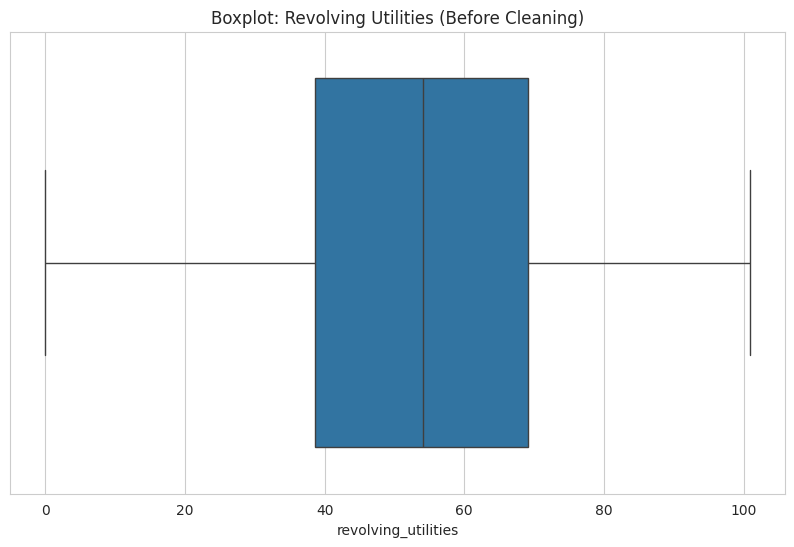

Revolving Utilities Stats:
count    65702.000000
mean        52.903236
std         22.529840
min          0.005172
25%         38.688893
50%         54.090584
75%         69.180050
max        100.880051
Name: revolving_utilities, dtype: float64


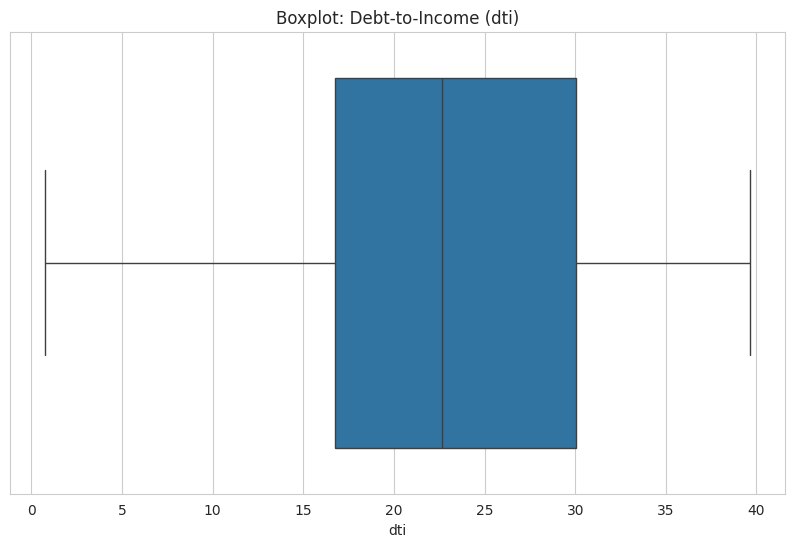


DTI Stats:
count    65702.000000
mean        23.281954
std          8.450033
min          0.763630
25%         16.739183
50%         22.637767
75%         30.025682
max         39.629864
Name: dti, dtype: float64

Rows remaining after cleaning Utilities and DTI: 65702


In [ ]:
# --- Step 1: Visualizing Revolving Utilities ---
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['revolving_utilities'])
plt.title('Boxplot: Revolving Utilities (Before Cleaning)')
plt.show()

# Print stats to see the max value
print("Revolving Utilities Stats:")
print(df['revolving_utilities'].describe())

# --- Step 2: Cleaning Revolving Utilities ---
# We generally keep values up to ~120-150% (people can slightly overdraw).
# Anything above 200 is likely an error.
util_threshold = 200
df = df[df['revolving_utilities'] <= util_threshold]

# --- Step 3: Visualizing DTI (Debt-to-Income) ---
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['dti'])
plt.title('Boxplot: Debt-to-Income (dti)')
plt.show()

# Print stats for DTI
print("\nDTI Stats:")
print(df['dti'].describe())

# --- Step 4: Cleaning DTI ---
# DTI is rarely above 50-60 for approved loans. Let's filter extreme outliers.
# You can adjust this threshold based on the boxplot you see.
dti_threshold = 100
df = df[df['dti'] <= dti_threshold]

print(f"\nRows remaining after cleaning Utilities and DTI: {len(df)}")

**The statistics confirm your data in these columns is already very clean and sensible:**

*   revolving_utilities: The Max is 100.88%. This is perfect. It means no one has a nonsensical value like 500%
*   dti: The Max is 39.6. This is also a very realistic ratio for approved loans.



# **3. Inconsistent data**

Our dataset does not have a Gender column (banks often exclude it to avoid bias laws)

In [ ]:
# Run this block to see which columns are "messy"
# 1. Identify categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# 2. Sort them by the number of unique items (Low to High)
# This helps us tackle the easy ones first, as you suggested.
sorted_cols = df[cat_cols].nunique().sort_values()

print("Unique values in Categorical Columns (Sorted):\n")
for col in sorted_cols.index:
    unique_vals = df[col].unique()
    # If there are too many values (like loan_title), just print the top 10
    if len(unique_vals) > 20:
        print(f"--- {col} ({len(unique_vals)} unique items) ---")
        print(f"Top 10 examples: {unique_vals[:10]} ...")
    else:
        print(f"--- {col} ({len(unique_vals)} unique items) ---")
        print(unique_vals)
    print("")

Unique values in Categorical Columns (Sorted):

--- payment_plan (1 unique items) ---
['n']
Categories (1, object): ['n']

--- initial_list_status (2 unique items) ---
['w', 'f']
Categories (2, object): ['f', 'w']

--- application_type (2 unique items) ---
['INDIVIDUAL', 'JOINT']
Categories (2, object): ['INDIVIDUAL', 'JOINT']

--- home_ownership (3 unique items) ---
['MORTGAGE', 'RENT', 'OWN']
Categories (3, object): ['MORTGAGE', 'OWN', 'RENT']

--- verification_status (3 unique items) ---
['Not Verified', 'Source Verified', 'Verified']
Categories (3, object): ['Not Verified', 'Source Verified', 'Verified']

--- grade (7 unique items) ---
['B', 'C', 'F', 'A', 'G', 'E', 'D']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

--- sub_grade (35 unique items) ---
Top 10 examples: ['C4', 'D3', 'D4', 'C3', 'G5', 'C5', 'A5', 'C2', 'B5', 'B1']
Categories (35, object): ['A1', 'A2', 'A3', 'A4', ..., 'G2', 'G3', 'G4', 'G5'] ...

--- batch_enrolled (41 unique items) ---
Top 10 examples:



*   Drop payment_plan: It has only 1 unique item ('n'). If every single row is the same, this column gives the model zero information. It is useless.

*   Drop batch_enrolled: It has 41 random codes (e.g., 'BAT2522922'). These are just administrative IDs and will only confuse the model.

*   Fix loan_title: This is the "Inconsistent Data" you were worried about. You have "Debt Consolidation" and "Debt consolidation" (different capitalization). We need to fix this text before the model sees it.




In [ ]:
# --- 1. Drop Useless Columns ---
# 'payment_plan' has zero variance. 'batch_enrolled' and 'loan_id' are IDs.
cols_to_drop = ['payment_plan', 'batch_enrolled', 'loan_id']

# Check if they exist before dropping to avoid errors if you run this twice
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])
print(f"Dropped columns: {cols_to_drop}")


# --- 2. Fix Inconsistent Text in 'loan_title' ---
# First, convert everything to lowercase to fix "Debt Consolidation" vs "debt consolidation"
df['loan_title'] = df['loan_title'].str.lower().str.strip()

# Now, let's see the Top 10 most common titles
top_titles = df['loan_title'].value_counts().nlargest(10).index.tolist()
print(f"\nTop 10 Loan Titles (Standardized): {top_titles}")

# Strategy: Keep the Top 10, and name everything else 'other'
# This reduces 109 messy categories down to just 11 clean ones.
df['loan_title'] = df['loan_title'].apply(lambda x: x if x in top_titles else 'other')

print("\nFinal Loan Title Categories:")
print(df['loan_title'].unique())

Dropped columns: ['payment_plan', 'batch_enrolled', 'loan_id']

Top 10 Loan Titles (Standardized): ['credit card refinancing', 'debt consolidation', 'other', 'home improvement', 'major purchase', 'medical expenses', 'business', 'consolidation', 'moving and relocation', 'car financing']

Final Loan Title Categories:
['debt consolidation' 'credit card refinancing' 'home improvement' 'other'
 'moving and relocation' 'medical expenses' 'major purchase' 'business'
 'consolidation' 'car financing']


In [ ]:
# Select all columns that are type 'object' or 'category'

#cat_cols = df.select_dtypes(include=['object', 'category']).columns

#print("Unique values in each categorical column:")
#for col in cat_cols:
#    print(f"\n--- {col} ---")
#    print(df[col].unique())
#    print(f"Number of unique values: {df[col].nunique()}")